## Classifying Restaurant Reviews with NLTK & Naïve Bayes Algorithm

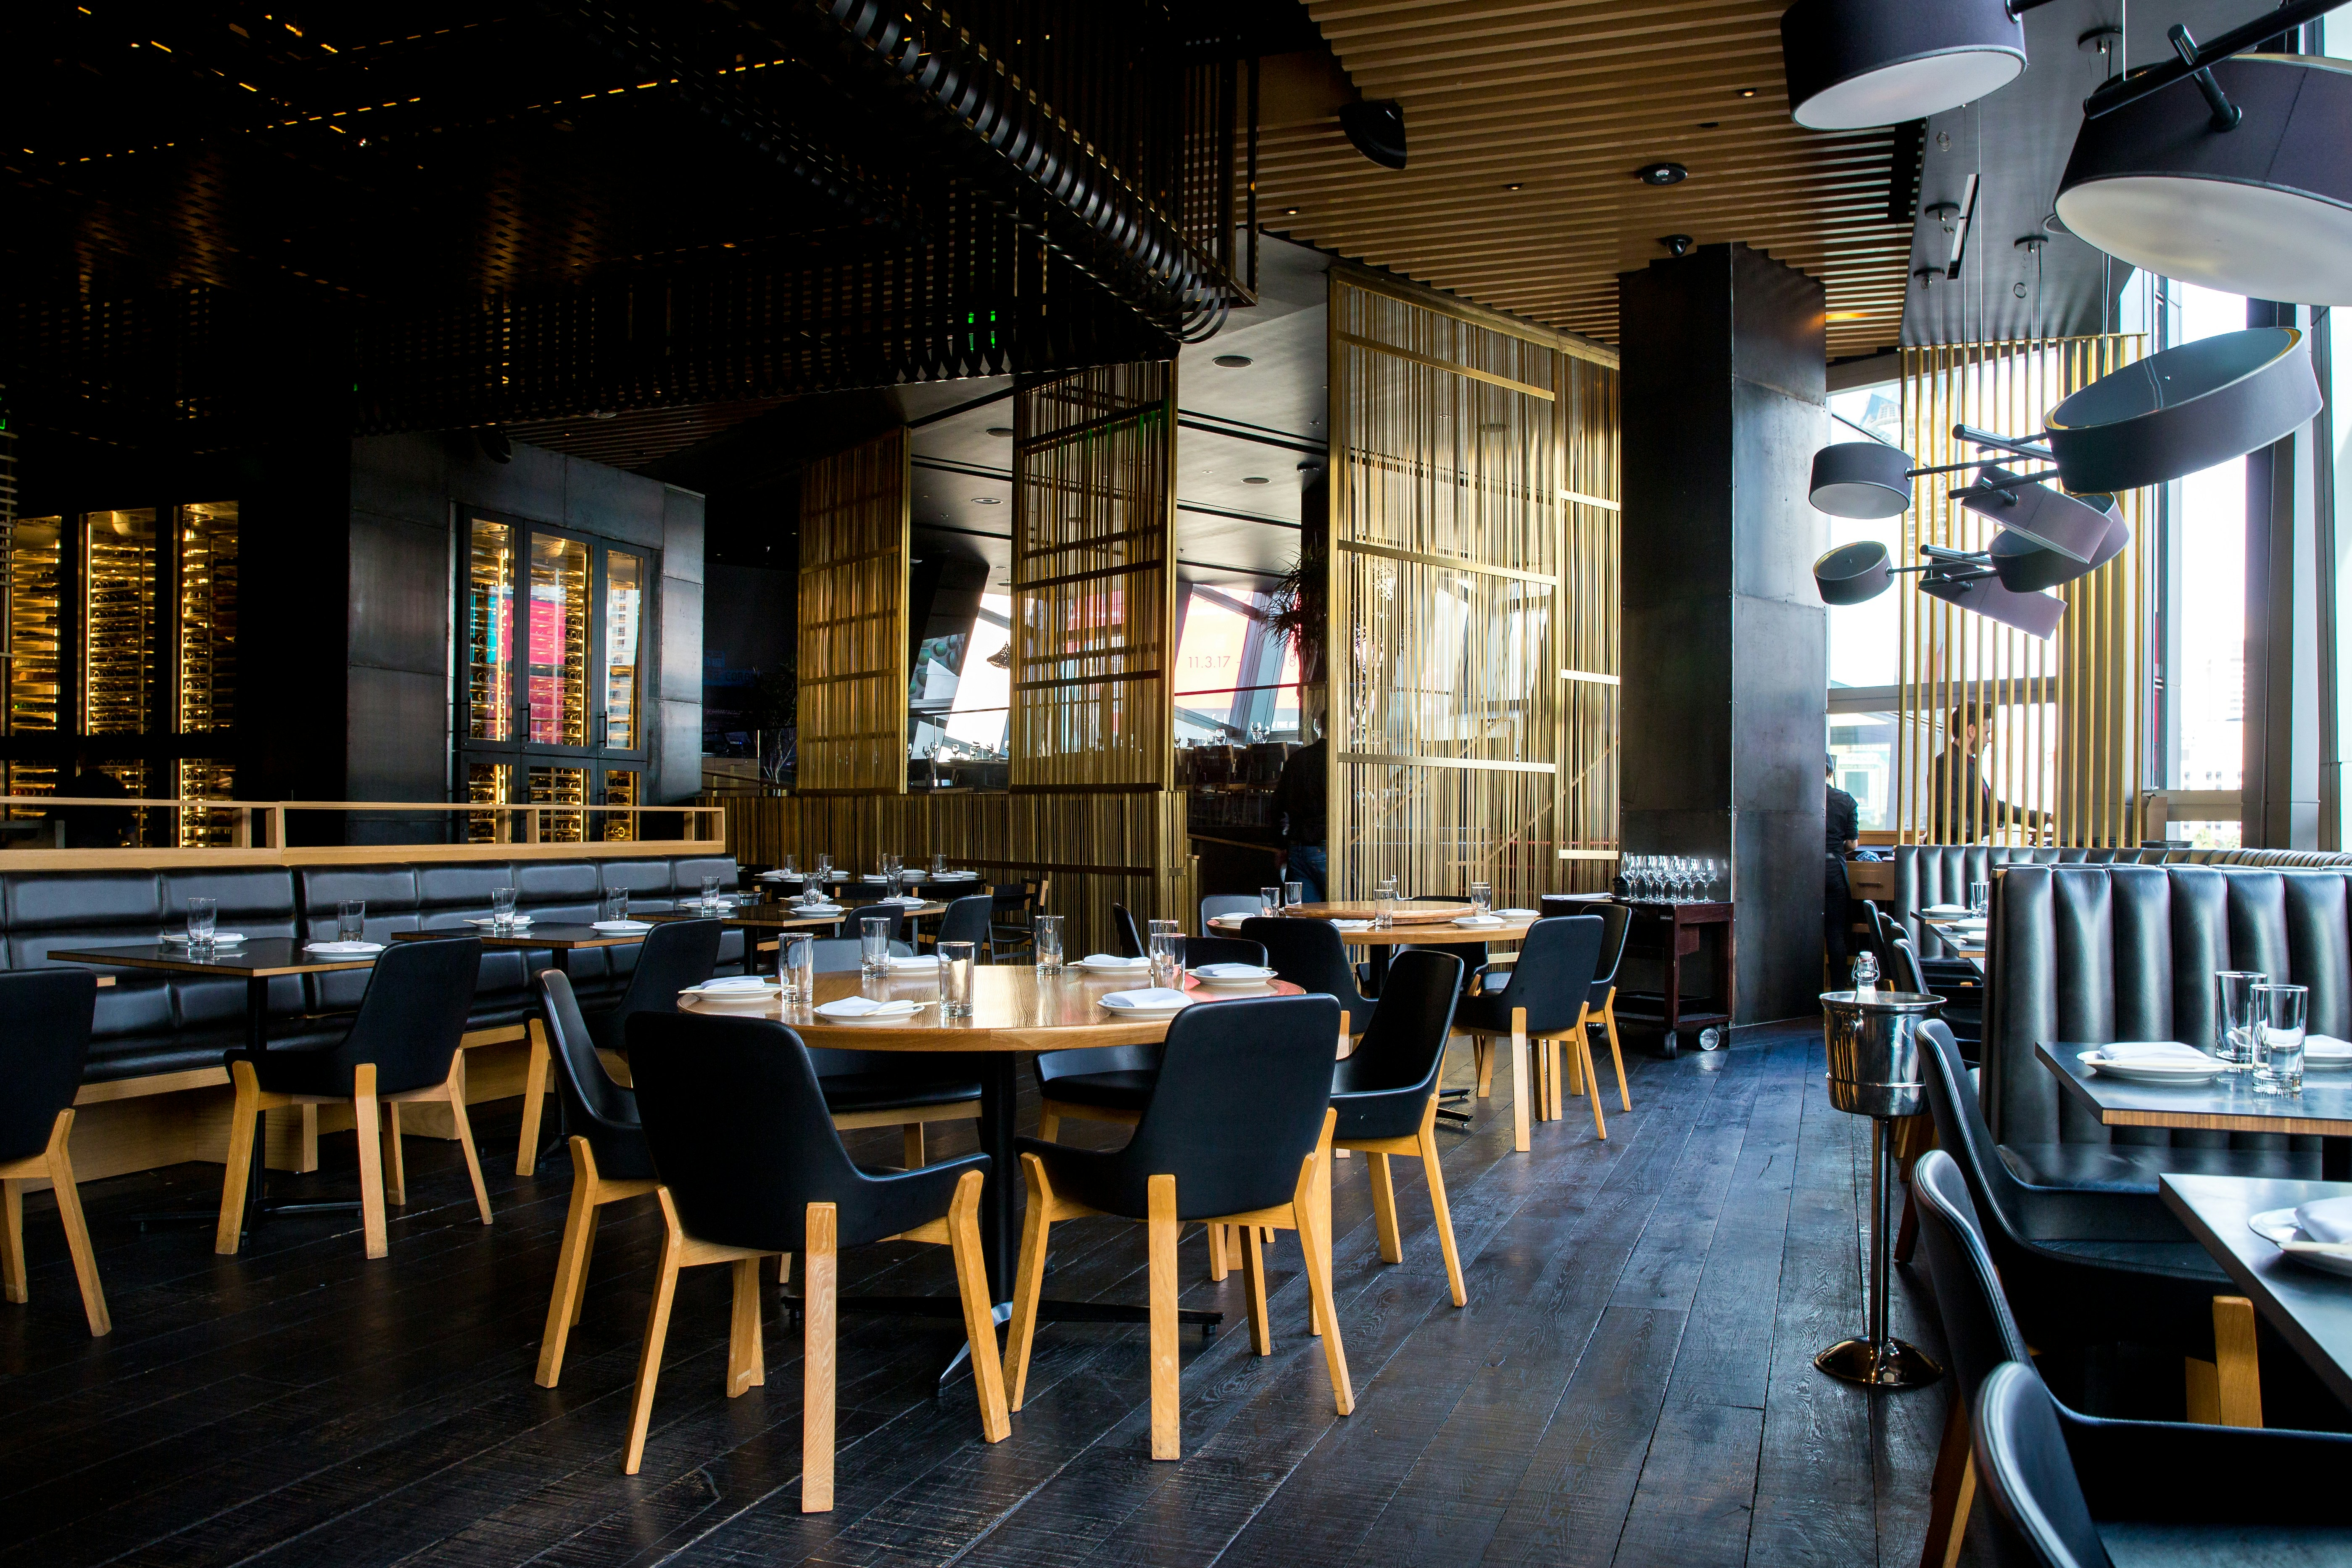

Use NLTK Porter stemmer to clean review data, then create a "bag-o-fwords" model 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dF = pd.read_csv('../Restaurant_Reviews/rest_reviews.tsv', sep='\t')

In [4]:
dF.head(), dF.tail()

(                                              Review  Liked
 0                           Wow... Loved this place.      1
 1                                 Crust is not good.      0
 2          Not tasty and the texture was just nasty.      0
 3  Stopped by during the late May bank holiday of...      1
 4  The selection on the menu was great and so wer...      1,
                                                 Review  Liked
 995  I think food should have flavor and texture an...      0
 996                           Appetite instantly gone.      0
 997  Overall I was not impressed and would not go b...      0
 998  The whole experience was underwhelming, and I ...      0
 999  Then, as if I hadn't wasted enough of my life ...      0)

In [5]:
dF.describe()

Liked
count  1000.00000
mean      0.50000
std       0.50025
min       0.00000
25%       0.00000
50%       0.50000
75%       1.00000
max       1.00000

# Cleaning Text Data

In [6]:
import nltk, re

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/finneassensiba/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords

#first_review = dF['Review'][0]
#print(first_review)

In [8]:
#review1 = re.sub('[^a-zA-Z]', ' ', first_review) # Removes punctuation- only words.
#print(review)

In [9]:
#review1 = review.lower()
#print(review)

In [10]:
#review1 = review.split()
#review1

In [11]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
#for word in review1:
    #if word in stopwords.words('english'):
        #review1.remove(word)
#review1
## or review1 = [word for word in review if word not in stopwords.words('english')]

In [13]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [14]:
#review2 = dF['Review'][1]

In [15]:
#review2 = [ps.stem(word) for word in review2]
#review2

In [16]:
#review2 = ''.join(review2)
#review2

In [17]:
corpus = []

for i in range(len(dF['Review'])):
    review = re.sub('[^a-zA-Z]', ' ', dF['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')] # Combine list comprehensions for porterstemmer and stop words
    review = ' '.join(review)
    corpus.append(review)

corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

# Bag-of-Words Model

Feature-engineering after cleaning text data. So cleaning the text data comes first. Bag-of-Words treats a text document like a bag of unordered words, rather than sequence in which order matters. Frequency of a word must then be mathematically represented via vectorization.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500) # only 1500 words will be allowed
X = cv.fit_transform(corpus).toarray()

In [19]:
X.shape

(1000, 1500)

In [20]:
y = dF.iloc[:, 1].values

In [21]:
y[:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

# Apply Naïve Bayes Algorithm

Apply a Gaussian Naive Bayes algo. A Gaussian NB assumes a normal (Gaussian) distribution of features. It's 'naive' in that it assumes features are independent from one another when in fact they aren't.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 0)
X_train.shape, X_test.shape

((670, 1500), (330, 1500))

In [23]:
from sklearn.naive_bayes import GaussianNB
gauss_clf = GaussianNB()
gauss_clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
y_pred = gauss_clf.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [26]:
print(f'Accuracy: %{100*accuracy_score(y_test, y_pred)}\nConfusion Matrix: \n{confusion_matrix(y_test, y_pred)}')

Accuracy: %70.60606060606061
Confusion Matrix: 
[[ 89  70]
 [ 27 144]]


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.56      0.65       159
           1       0.67      0.84      0.75       171

   micro avg       0.71      0.71      0.71       330
   macro avg       0.72      0.70      0.70       330
weighted avg       0.72      0.71      0.70       330



See https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://sifisheriessciences.com/journal/index.php/journal/article/download/389/372/741%23:~:text%3DAccording%2520to%2520the%2520graph%252C%2520Naive,high%2520compared%2520to%2520Naive%2520Baye.%26text%3DThe%2520results%2520obtained%2520indicate%2520that,higher%2520accuracy%2520than%2520RandomForest%2520Classifier.&ved=2ahUKEwiC4NvlmdyFAxVlD1kFHaysBUoQFnoECBQQAw&usg=AOvVaw22LXM56L1ulVAyBUAqxcrp
For more info about Gaussian Naive Bayes vs. Random Forest Algorithm accuracy and consistency.